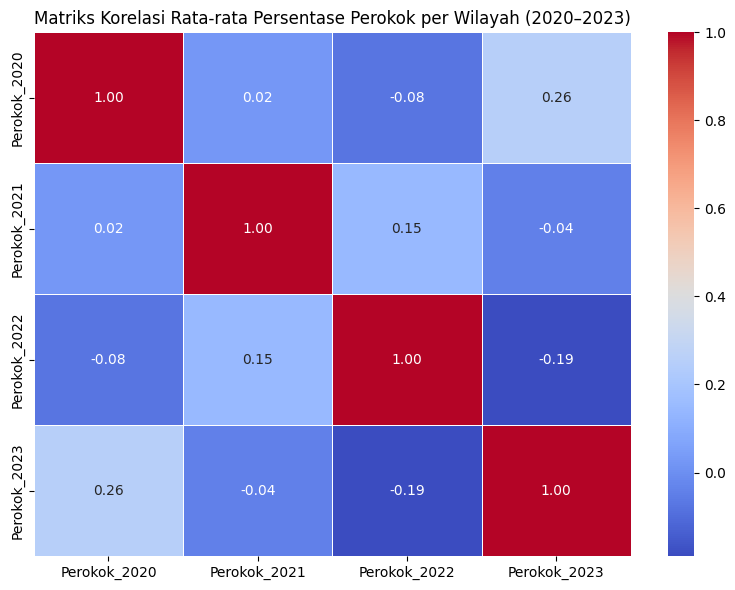

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Path ke folder tempat file CSV disimpan
data_path = r"D:\Project Python\Simple_PythonProjects\DataScience_Python\DataScience_Python\data_csv\dataB"

# Fungsi untuk hitung rata-rata per wilayah dari semua kelompok umur
def load_and_prepare(file_name, year_suffix):
    df = pd.read_csv(os.path.join(data_path, file_name))
    # Ambil kolom perokok berdasarkan umur
    umur_cols = ['Perokok 15-24', 'Perokok 25-34', 'Perokok 35-44', 
                 'Perokok 45-54', 'Perokok 55-64', 'Perokok 65+']
    # Hitung rata-rata per wilayah
    df[f'Perokok_{year_suffix}'] = df[umur_cols].mean(axis=1)
    return df[['Wilayah', f'Perokok_{year_suffix}']]

# Load dan olah semua data
data_2020 = load_and_prepare("2020b.csv", "2020")
data_2021 = load_and_prepare("2021b.csv", "2021")
data_2022 = load_and_prepare("2022B.csv", "2022")
data_2023 = load_and_prepare("2023b.csv", "2023")

# Gabungkan semua tahun berdasarkan 'Wilayah'
merged_data = data_2020.merge(data_2021, on='Wilayah')
merged_data = merged_data.merge(data_2022, on='Wilayah')
merged_data = merged_data.merge(data_2023, on='Wilayah')

# Hitung korelasi
correlation_data = merged_data[['Perokok_2020', 'Perokok_2021', 'Perokok_2022', 'Perokok_2023']]
correlation_matrix = correlation_data.corr()

# Visualisasikan matriks korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi Rata-rata Persentase Perokok per Wilayah (2020–2023)")
plt.tight_layout()
plt.show()
